# Piyush Yadav 23/CS/301


# Lab 02 – Data Ingestion, Missing Values, Outliers

This notebook follows a structured process to:
1. Load and inspect the Titanic dataset.
2. Perform Exploratory Data Analysis (EDA).
3. Handle missing values using appropriate imputation techniques.
4. Detect and treat outliers in the `Fare` column.
5. Save the cleaned dataset and document preprocessing choices.



## Step 1 – Load Titanic CSV

We begin by importing required libraries and loading the Titanic dataset into a Pandas DataFrame.


In [2]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")



## Step 2 – Exploratory Data Analysis (EDA)

We will:
- Check dataset information (`.info()`)
- Summarize numeric columns (`.describe()`)
- Visualize missing values with a heatmap



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

--- Dataset Description ---
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.

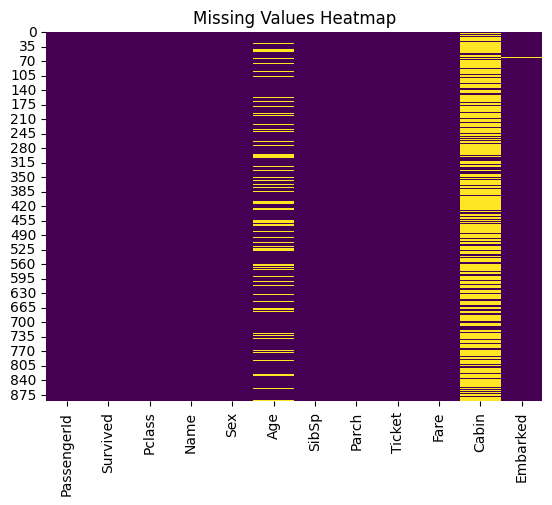

In [3]:

print("\n--- Dataset Info ---")
print(df.info())

print("\n--- Dataset Description ---")
print(df.describe())

sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()



## Step 3 – Handle Missing Values

We will:
- Create binary flags for missingness (for reproducibility).
- Impute `Age` with the median (robust to skew).
- Impute `Embarked` with the mode (most frequent value).
- Drop `Cabin` due to excessive missing values (>75%).


In [ ]:

# Add missing value flags
df['Age_missing'] = df['Age'].isnull().astype(int)
df['Embarked_missing'] = df['Embarked'].isnull().astype(int)

# Impute missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin as it has >75% missing
df.drop(columns=['Cabin'], inplace=True)


/var/folders/dy/n39312m176q_0131_6rzrpxm0000gn/T/ipykernel_25622/25873349.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/var/folders/dy/n39312m176q_0131_6rzrpxm0000gn/T/ipykernel_25622/25873349.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always


## Step 4 – Handle Outliers in Fare

We will use the IQR method to detect and cap outliers in the `Fare` column:
- Calculate Q1 and Q3.
- Compute the IQR.
- Cap fares above `Q3 + 1.5 * IQR` to the upper threshold.


In [5]:

Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR

df['Fare'] = df['Fare'].apply(lambda x: upper_limit if x > upper_limit else x)



## Step 5 – Save Clean Dataset

Save the cleaned dataset to `clean_v1.csv` for later analysis.


In [6]:

df.to_csv("clean_v1.csv", index=False)



## Step 6 – Create Documentation

We create two markdown files:
- **data_card.md**: Summarizes dataset, features, preprocessing, and limitations.
- **decision_log.md**: Logs each data preprocessing decision and rationale.


In [7]:

data_card_content = f"""# Data Card – Titanic Dataset

## Dataset Overview
- **Source:** https://www.kaggle.com/c/titanic/data
- **Format:** CSV
- **Rows:** {df.shape[0]}
- **Columns:** {df.shape[1]} (after cleaning)
- **Target Variable:** Survived (1 = survived, 0 = did not survive)

## Key Features
- **Categorical:** Sex, Embarked, Pclass
- **Numerical:** Age, Fare, SibSp, Parch
- **Mixed:** Ticket

## Preprocessing Summary
- Missing values in Age imputed with median.
- Missing values in Embarked imputed with mode.
- Cabin dropped due to >75% missing data.
- Outliers in Fare capped using IQR method.
- Added binary flags for originally missing values.

## Limitations
- Outlier treatment may remove real but rare high fares.
- Imputation assumptions may bias results.
- Dropping Cabin removes potential location-based insights.

## License & Usage
- Academic and research use under Kaggle rules.
"""

decision_log_content = """# Decision Log – Titanic Data Cleaning

## Step 1: Data Ingestion
- Loaded titanic.csv into Pandas DataFrame.
- Checked data types and summary stats.

## Step 2: Missing Value Handling
- Age: median imputation.
- Embarked: mode imputation.
- Cabin: dropped (>75% missing).
- Added Age_missing, Embarked_missing flags.

## Step 3: Outlier Treatment
- Fare: capped above Q3 + 1.5*IQR.

## Step 4: Output
- Saved clean_v1.csv, data_card.md, decision_log.md.

## Rationale
Methods chosen for simplicity, reproducibility, and teaching clarity.
"""

with open("data_card.md", "w") as f:
    f.write(data_card_content)

with open("decision_log.md", "w") as f:
    f.write(decision_log_content)



## Step 7 – Print Documentation

Display the contents of `data_card.md` and `decision_log.md` in the notebook for review.


In [8]:

print("\n--- data_card.md ---\n")
print(data_card_content)

print("\n--- decision_log.md ---\n")
print(decision_log_content)



--- data_card.md ---

# Data Card – Titanic Dataset

## Dataset Overview
- **Source:** https://www.kaggle.com/c/titanic/data
- **Format:** CSV
- **Rows:** 891
- **Columns:** 13 (after cleaning)
- **Target Variable:** Survived (1 = survived, 0 = did not survive)

## Key Features
- **Categorical:** Sex, Embarked, Pclass
- **Numerical:** Age, Fare, SibSp, Parch
- **Mixed:** Ticket

## Preprocessing Summary
- Missing values in Age imputed with median.
- Missing values in Embarked imputed with mode.
- Cabin dropped due to >75% missing data.
- Outliers in Fare capped using IQR method.
- Added binary flags for originally missing values.

## Limitations
- Outlier treatment may remove real but rare high fares.
- Imputation assumptions may bias results.
- Dropping Cabin removes potential location-based insights.

## License & Usage
- Academic and research use under Kaggle rules.


--- decision_log.md ---

# Decision Log – Titanic Data Cleaning

## Step 1: Data Ingestion
- Loaded titanic.csv int